<a href="https://colab.research.google.com/github/Nonjab/SuppExam/blob/main/Sbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22000786 Mazibuko SR

In [ ]:
import pandas as pd
import numpy as nP
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/tourisim/tourism_dataset.csv")

DATA SOURCING



The dataset used for this assessment is titled **"tourism_dataset.csv"**(.https://www.kaggle.com/datasets/umeradnaan/tourism-dataset) It contains information relevant to tourism metrics such as country, region, number of visitors, and related statistics. It was sourced for analysis to align with the theme of tourism and cultural diversity. The data structure and format (.csv) is ideal for data science workflows using Python.

This dataset is relevant to the South African tourism context as it provides a structural baseline that could be representative of real visitor metrics, destinations, and trends when performing a comparative study or modeling. Even though it’s not strictly South African, the techniques demonstrated can be applied on similar national datasets.


Machine Learning Project Life cycle



1.Problem Definition: Understand the theme: Tourism and cultural diversity in South Africa.

2.Data Collection: Done via provided CSV dataset.

3.Data Understanding: Summarize the data, check data types and distributions.

4.Data Cleaning:Handle missing values, duplicates, and wrong data types.

5.Data Preparation:Encode values, scale or normalize if needed.

6.Modeling: Although this project focuses on EDA, models could be used later.

7.Evaluation: Interpret findings, graph outputs.

8.Deployment: (Not part of this project, but would involve dashboarding or API).


DATA UNDERSTANDING

Displaying basic info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB


show first few rows

In [ ]:
df.head()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


showing last five rowws

In [ ]:
df.tail()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,No
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes
5988,gHXUrdticm,France,Cultural,40939,4.65,957026.85,Yes



Summary stats




In [ ]:
df.describe(include='all')

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
count,5989,5989,5989,5989.000000,5989.000000,5989.000000,5989
unique,5989,7,6,NaN,NaN,NaN,2
top,gHXUrdticm,Egypt,Adventure,NaN,NaN,NaN,Yes
freq,1,912,1037,NaN,NaN,NaN,3013
mean,NaN,NaN,NaN,501016.089497,3.009347,499479.367253,NaN
std,NaN,NaN,NaN,289783.294978,1.155980,286743.225211,NaN
min,NaN,NaN,NaN,1108.000000,1.000000,1025.810000,NaN
25%,NaN,NaN,NaN,252789.000000,2.010000,251410.450000,NaN
50%,NaN,NaN,NaN,500831.000000,3.000000,494169.350000,NaN
75%,NaN,NaN,NaN,751371.000000,4.010000,742241.240000,NaN


Checking for unique values in categorical columns


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Location:
['kuBZRkVsAR' 'aHKUXhjzTo' 'dlrdYtJFTA' ... 'bPyubCWGgA' 'kkWIucpBnu'
 'gHXUrdticm']

Unique values in Country:
['India' 'USA' 'Brazil' 'France' 'Egypt' 'China' 'Australia']

Unique values in Category:
['Nature' 'Historical' 'Cultural' 'Beach' 'Adventure' 'Urban']

Unique values in Accommodation_Available:
['Yes' 'No']


Data Cleaning

 Checking for missing values


In [ ]:
df.isnull().sum()

,0
Location,0
Country,0
Category,0
Visitors,0
Rating,0
Revenue,0
Accommodation_Available,0


 Fill or drop missing values


In [ ]:
df = df.dropna()

Check for duplicates


In [ ]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


 Renaming inconsistent columns


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


OUTLIER DETECTION

In [ ]:
top_countries = df.groupby('country')['visitors'].sum().sort_values(ascending=False)


Q1 = top_countries.quantile(0.25)
Q3 = top_countries.quantile(0.75)
IQR = Q3 - Q1


top_countries_cleaned = top_countries[~((top_countries < (Q1 - 1.5 * IQR)) | (top_countries > (Q3 + 1.5 * IQR)))]


top_countries_cleaned.head(10)



,visitors
country,
Egypt,458573652
India,451083005
USA,431204187
France,424944621
Australia,416038005
Brazil,414293518
China,404448372


DATA SLICING

Calculating Mean, Meadian and Mode

In [15]:




# Convert 'Revenue' column to numeric (in case it's stored as string with symbols)
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Drop rows with NaN values in 'Revenue'
df_clean = df.dropna(subset=['Revenue'])

# Calculate statistics
mean_value = df_clean['Revenue'].mean()
median_value = df_clean['Revenue'].median()
mode_value = df_clean['Revenue'].mode()

# Print results
print("Mean Revenue:", mean_value)
print("Median Revenue:", median_value)
print("Mode Revenue:", mode_value.tolist())


Mean Revenue: 499479.3672532978
Median Revenue: 494169.35
Mode Revenue: [1025.81, 1103.02, 1227.89, 1374.83, 1739.4, 1897.79, 2002.51, 2063.79, 2098.46, 2168.15, 2282.32, 2284.16, 2472.45, 2637.17, 2685.26, 2731.01, 2884.36, 3016.4, 3201.21, 3491.73, 3811.54, 3905.35, 3977.68, 4061.49, 4282.14, 4355.05, 4374.71, 4490.1, 4827.09, 4869.82, 5205.99, 5324.14, 5342.25, 5757.07, 5758.27, 5767.1, 5819.3, 6304.08, 6359.01, 6543.17, 6619.56, 7490.22, 7647.76, 8085.96, 8310.47, 8594.5, 8755.67, 8769.54, 8963.95, 8967.89, 9094.38, 9539.17, 9572.54, 10025.16, 10248.68, 10352.56, 10819.52, 10949.43, 11341.43, 11491.08, 11504.81, 11552.07, 11715.28, 11803.74, 12184.01, 12272.96, 12430.35, 12527.82, 12720.26, 12852.41, 12922.97, 13255.08, 13352.38, 13995.7, 14061.3, 14205.15, 14351.71, 14706.48, 14743.04, 14827.01, 14913.62, 15173.77, 15196.59, 15674.81, 15701.97, 15736.81, 15819.25, 16201.5, 16455.9, 16559.73, 16583.47, 16659.03, 16675.88, 16958.3, 17133.76, 17168.67, 17408.75, 17422.13, 17593.56, 1

Using iloc(index-based selection)

In [16]:

# Using iloc: select first 5 rows, first 3 columns
subset_iloc = df.iloc[0:5, 0:3]
print("Using iloc:")
print(subset_iloc)

# Using loc: select existing column names
subset_loc = df.loc[:, ['Location', 'Country', 'Revenue']]
print("\nUsing loc:")
print(subset_loc.head())

# Column indexing using an existing column
value_column = df['Revenue']
print("\nUsing column indexing:")
print(value_column.head())


Using iloc:
     Location Country    Category
0  kuBZRkVsAR   India      Nature
1  aHKUXhjzTo     USA  Historical
2  dlrdYtJFTA  Brazil      Nature
3  DxmlzdGkHK  Brazil  Historical
4  WJCCQlepnz  France    Cultural

Using loc:
     Location Country    Revenue
0  kuBZRkVsAR   India   84388.38
1  aHKUXhjzTo     USA  802625.60
2  dlrdYtJFTA  Brazil  338777.11
3  DxmlzdGkHK  Brazil  295183.60
4  WJCCQlepnz  France  547893.24

Using column indexing:
0     84388.38
1    802625.60
2    338777.11
3    295183.60
4    547893.24
Name: Revenue, dtype: float64


Bar Plot Countries by Visitors

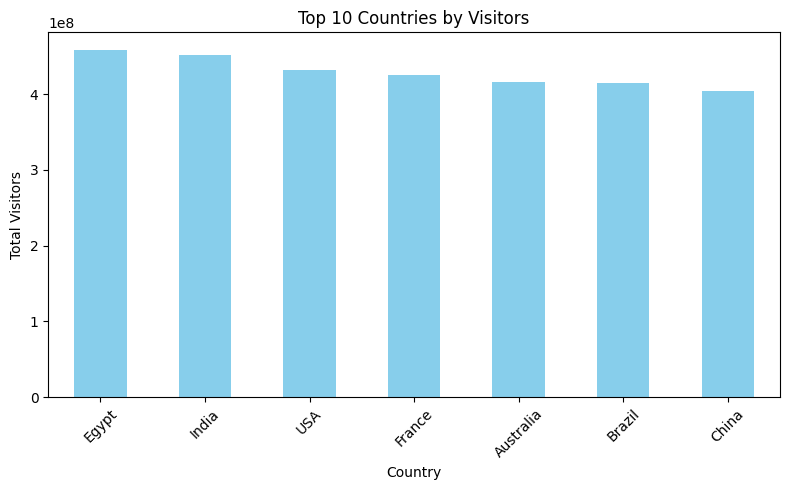

In [ ]:
# Group and sort
top_countries = df.groupby('country')['visitors'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Visitors')
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pie Chart  Distribution of Tourism Categories

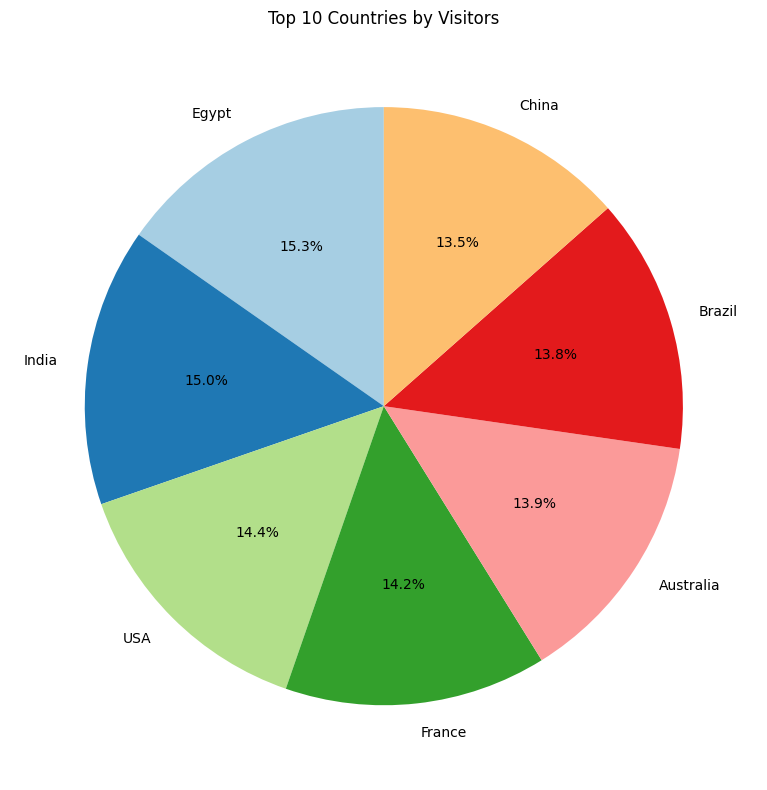

In [ ]:

top_countries = df.groupby('country')['visitors'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Countries by Visitors')
plt.ylabel('')
plt.tight_layout()
plt.show()


 Line Plot of Average Rating per Country

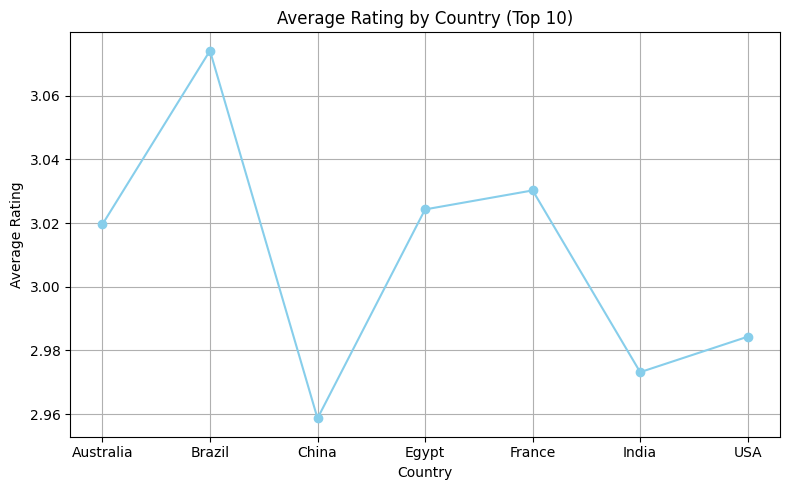

In [ ]:

top_rated = df['country'].value_counts().head(10).index
avg_rating = df[df['country'].isin(top_rated)].groupby('country')['rating'].mean()


plt.figure(figsize=(8, 5))
avg_rating.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Rating by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


Histogram Distribution of Visitors

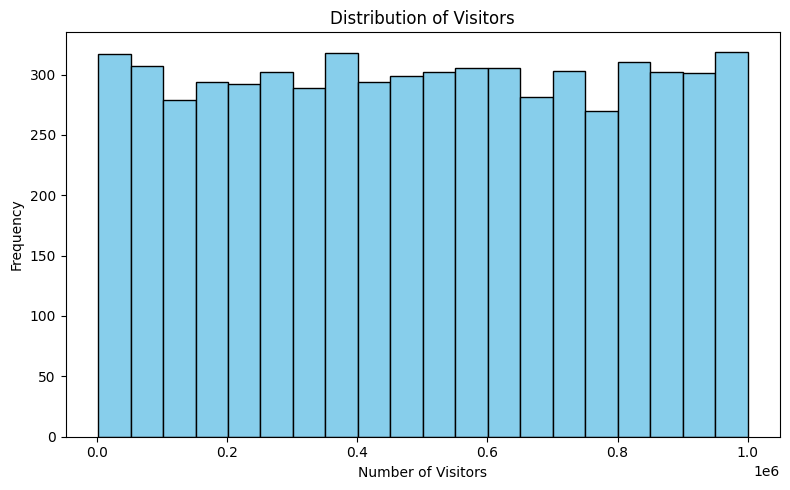

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
df['visitors'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Visitors')
plt.xlabel('Number of Visitors')
plt.tight_layout()
plt.show()


Scatter Plot  Visitors vs Revenue

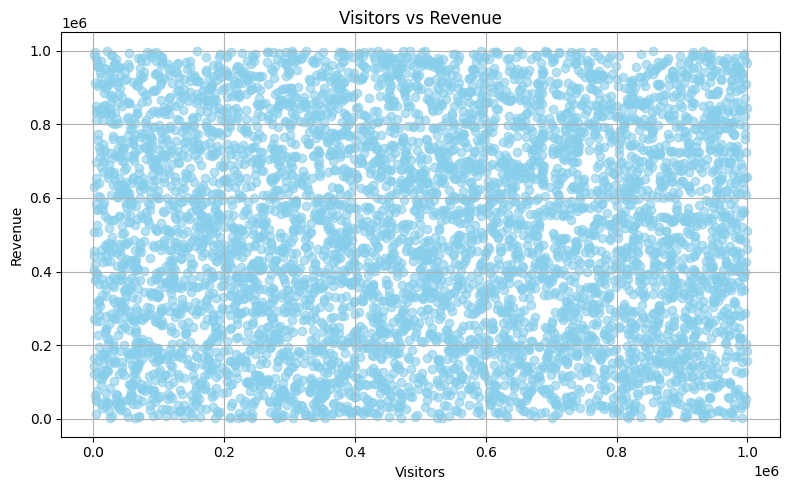

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['visitors'], df['revenue'], alpha=0.6, color='skyblue')
plt.title('Visitors vs Revenue')
plt.xlabel('Visitors')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


 Boxplot  Visitors by Accommodation Availability

<ipython-input-25-29ba087dae04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accommodation_available', y='visitors', data=df, palette='Set2')


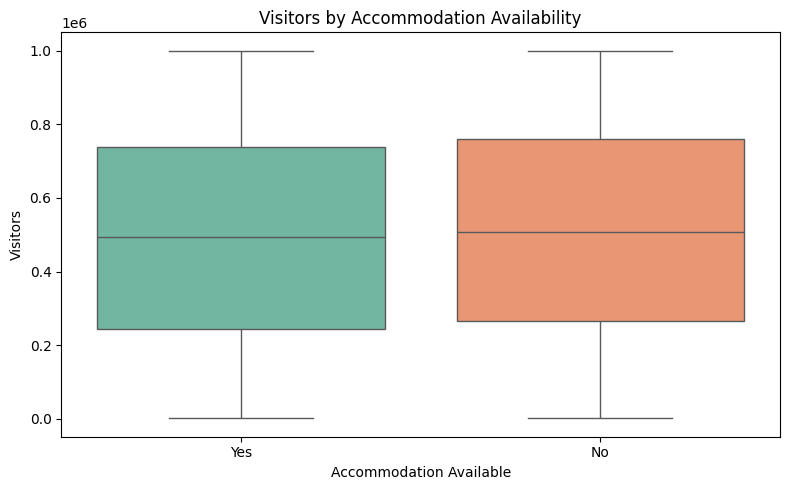

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='accommodation_available', y='visitors', data=df, palette='Set2')
plt.title('Visitors by Accommodation Availability')
plt.xlabel('Accommodation Available')
plt.ylabel('Visitors')
plt.tight_layout()
plt.show()


Heatmap  Feature Correlation

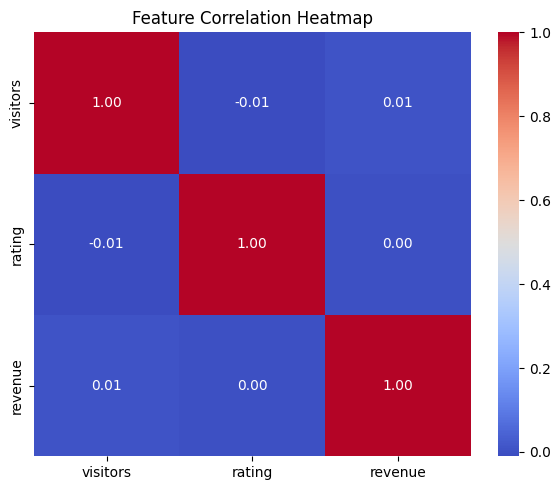

In [ ]:

plt.figure(figsize=(6, 5))
sns.heatmap(df[['visitors', 'rating', 'revenue']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


 Area Chart  Total Revenue by Top 5 Countries

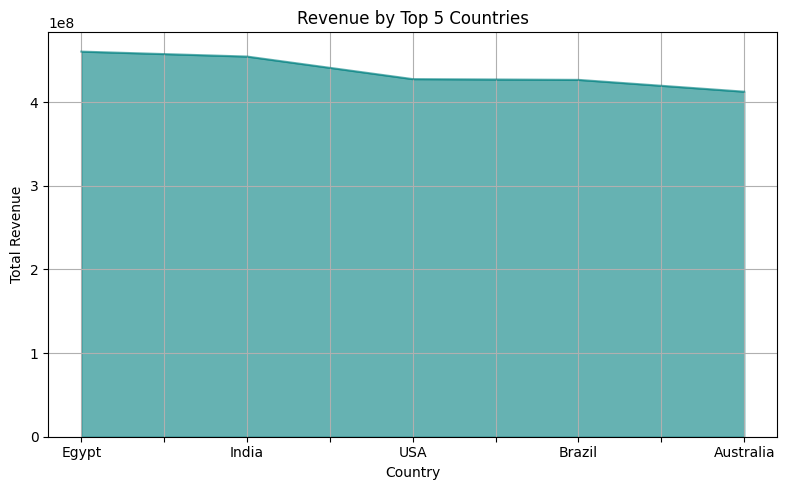

In [ ]:

top_revenue = df.groupby('country')['revenue'].sum().sort_values(ascending=False).head(5)


plt.figure(figsize=(8, 5))
top_revenue.plot(kind='area', color='teal', alpha=0.6)
plt.title('Revenue by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()
